In [707]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [708]:
#training = pd.read_csv('trainingC.csv', encoding = "latin")
training = pd.read_csv('cloudTrain.csv')

In [709]:
training.shape

(6812, 20)

In [710]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_RAIN,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,year,day,AVERAGE_CLOUDINESS
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,NOTHING,2963.10,82.9,35.743064,5.756936,2019,29,nuvens quebradas
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,NOTHING,3644.58,135.7,26.857627,14.842373,2018,10,céu limpo
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,NOTHING,3288.72,123.6,26.607767,11.992233,2019,1,céu pouco nublado
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,NOTHING,3519.34,155.1,22.690780,14.709220,2019,26,céu limpo
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,NOTHING,3203.20,127.4,25.142857,16.457143,2019,6,nuvens quebradas


In [711]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_PRECIPITATION    6812 non-null   float64
 12  AVERAGE_RAIN             6812 non-null   object 
 13  AVERAGE_DISTANCE_FREE    6812 non-null   float64
 14  AVERAGE_TIME            

In [712]:
training['AVERAGE_DISTANCE_FREE'] = training['AVERAGE_FREE_FLOW_TIME'] * training['AVERAGE_FREE_FLOW_SPEED']

In [713]:
training['AVERAGE_TIME'] = training['AVERAGE_TIME_DIFF'] + training['AVERAGE_FREE_FLOW_TIME'] 

In [714]:
training['AVERAGE_SPEED'] =  training['AVERAGE_DISTANCE_FREE'] / training['AVERAGE_TIME']

In [715]:
training['AVERAGE_SPEED_DIFF_Num'] =  training['AVERAGE_FREE_FLOW_SPEED'] - training['AVERAGE_SPEED']

In [716]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_RAIN,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,year,day,AVERAGE_CLOUDINESS
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,NOTHING,2963.10,82.9,35.743064,5.756936,2019,29,nuvens quebradas
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,NOTHING,3644.58,135.7,26.857627,14.842373,2018,10,céu limpo
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,NOTHING,3288.72,123.6,26.607767,11.992233,2019,1,céu pouco nublado
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,NOTHING,3519.34,155.1,22.690780,14.709220,2019,26,céu limpo
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,NOTHING,3203.20,127.4,25.142857,16.457143,2019,6,nuvens quebradas


In [717]:
training['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [718]:
training['AVERAGE_SPEED_DIFF'] = training['AVERAGE_SPEED_DIFF'].astype('category')
training['AVERAGE_RAIN'] = training['AVERAGE_RAIN'].astype('category')

In [719]:
training['city_name'].value_counts()

Porto    6812
Name: city_name, dtype: int64

In [720]:
training['LUMINOSITY'].value_counts()

LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: LUMINOSITY, dtype: int64

In [721]:
training['AVERAGE_CLOUDINESS'].value_counts()

nuvens quebradas     3106
céu limpo            2027
céu pouco nublado    1492
nublado               187
Name: AVERAGE_CLOUDINESS, dtype: int64

In [722]:
training['AVERAGE_RAIN'].value_counts()

NOTHING                        6249
chuva fraca                     261
chuva moderada                  153
chuva leve                       45
aguaceiros fracos                38
chuva                            30
aguaceiros                       11
chuva forte                       8
trovoada com chuva leve           7
chuvisco fraco                    5
chuva de intensidade pesado       2
chuva de intensidade pesada       1
chuvisco e chuva fraca            1
trovoada com chuva                1
Name: AVERAGE_RAIN, dtype: int64

In [723]:
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,year,day
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0,6812.000000,6812.000000,6812.000000,6.812000e+03,6812.000000,6812.000000
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0,3291.883629,106.781063,33.242410,7.418600e+00,2018.600117,16.169554
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0,413.668194,34.963319,8.696429,7.499522e+00,0.489910,8.794487
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0,1647.200000,48.100000,8.772108,-7.105427e-15,2018.000000,1.000000
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0,3024.030000,84.000000,26.610483,1.163352e+00,2018.000000,9.000000
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0,3342.710000,95.600000,33.951761,5.116578e+00,2019.000000,17.000000
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0,3593.520000,121.300000,40.600000,1.157550e+01,2019.000000,24.000000
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0,4751.320000,369.900000,55.600000,3.799432e+01,2019.000000,31.000000


In [724]:
trainingWork = training.copy()

In [725]:
trainingWork['record_date'] = pd.to_datetime(trainingWork['record_date'])

trainingWork['weekday'] = trainingWork['record_date'].dt.dayofweek
trainingWork['hour'] = trainingWork['record_date'].dt.hour
trainingWork['month'] = trainingWork['record_date'].dt.month
trainingWork['year'] = trainingWork['record_date'].dt.year
trainingWork['day'] = trainingWork['record_date'].dt.day

In [726]:
def applyer(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0 
temp2 = trainingWork['weekday'].apply(applyer) 
trainingWork['weekend']=temp2

In [727]:
#trainingWork = trainingWork.drop(['city_name','record_date','AVERAGE_PRECIPITATION'],axis=1)

In [728]:
#sns.pairplot(trainingWork)

Prediction Target:

 2   AVERAGE_SPEED_DIFF       6812 non-null   object 

Possibilities:

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
 

Features:

 0   city_name                6812 non-null   object 
 
 1   record_date              6812 non-null   object ----> All the same value 'Porto' -> Remove

 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64


 6   LUMINOSITY               6812 non-null   object ----> categorical
LIGHT        3293
DARK         3253
LOW_LIGHT     266


 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64

 11  AVERAGE_CLOUDINESS       4130 non-null   object
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67

Missing data -> 39.4% ---> Mode? Removal? over/under Fitting?

 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64 --> All same values -> Remove
 
 13  AVERAGE_RAIN             563 non-null    object 
chuva fraca                    261
chuva moderada                 153
chuva leve                      45
aguaceiros fracos               38
chuva                           30
aguaceiros                      11
chuva forte                      8
trovoada com chuva leve          7
chuvisco fraco                   5
chuva de intensidade pesado      2
chuva de intensidade pesada      1
trovoada com chuva               1
chuvisco e chuva fraca           1

Missing data -> 91.7% ----> Removal

In [729]:
corr = trainingWork.copy()

corr['AVERAGE_RAIN']=corr['AVERAGE_RAIN'].astype('category').cat.codes
corr['AVERAGE_RAIN'].sort_values(ascending=False)

corr['AVERAGE_CLOUDINESS']=corr['AVERAGE_CLOUDINESS'].astype('category').cat.codes
corr['AVERAGE_CLOUDINESS'].sort_values(ascending=False)

corr['AVERAGE_SPEED_DIFF']=corr['AVERAGE_SPEED_DIFF'].astype('category').cat.codes
corr['AVERAGE_SPEED_DIFF'].sort_values(ascending=False)

corr['LUMINOSITY']=corr['LUMINOSITY'].astype('category').cat.codes
corr['LUMINOSITY'].sort_values(ascending=False)



2396    2
6185    2
2072    2
2078    2
4049    2
       ..
4105    0
4106    0
4107    0
4109    0
6811    0
Name: LUMINOSITY, Length: 6812, dtype: int8

<AxesSubplot:>

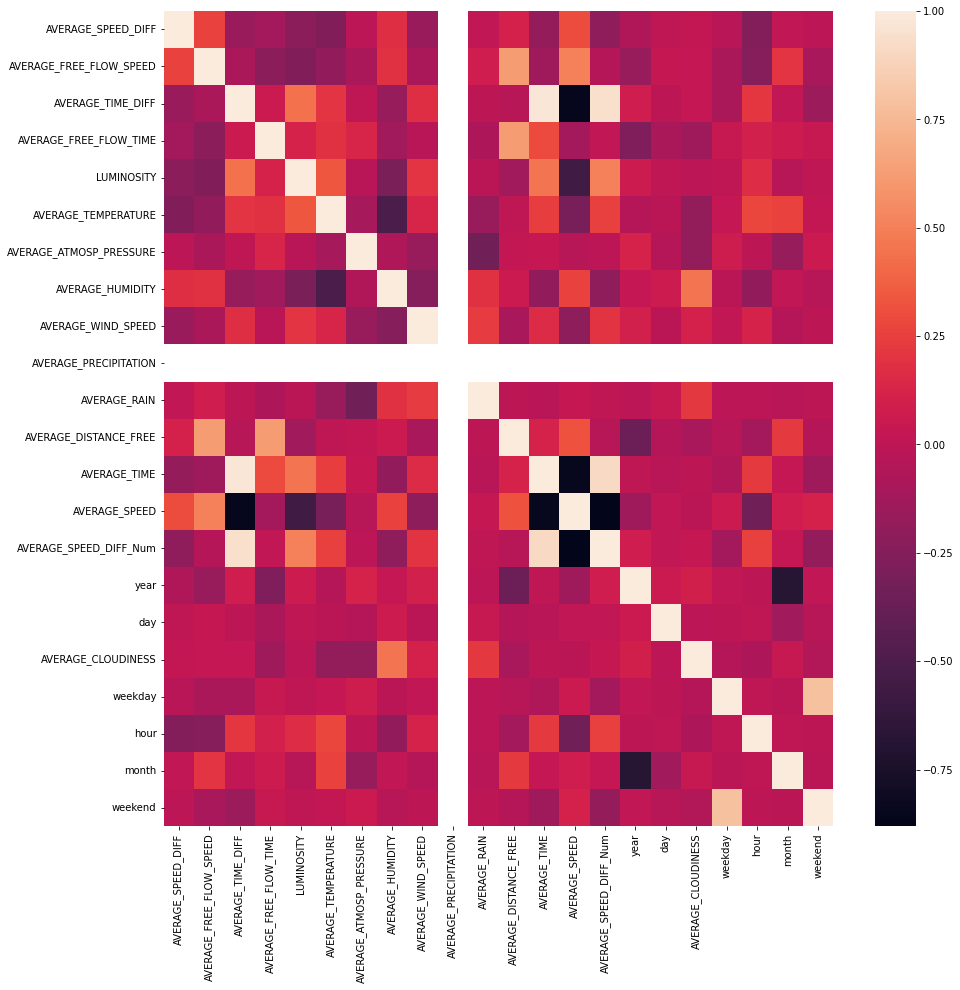

In [730]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr.corr())

Numerical values:  

AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64  
AVERAGE_TIME_DIFF        6812 non-null   float64  
AVERAGE_FREE_FLOW_TIME   6812 non-null   float64  
AVERAGE_TEMPERATURE      6812 non-null   float64  
AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64  
AVERAGE_HUMIDITY         6812 non-null   float64  
AVERAGE_WIND_SPEED       6812 non-null   float64  
AVERAGE_PRECIPITATION    6812 non-null   float64  
weekday                  6812 non-null   int64    
hour                     6812 non-null   int64    
month                    6812 non-null   int64    

Categorical Values  
city_name                6812 non-null   object  
record_date              6812 non-null   object  
AVERAGE_SPEED_DIFF       6812 non-null   object   
LUMINOSITY               6812 non-null   object   
AVERAGE_CLOUDINESS       4130 non-null   object   
AVERAGE_RAIN             563 non-null    object   

In [731]:
trainingWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   LUMINOSITY               6812 non-null   object        
 7   AVERAGE_TEMPERATURE      6812 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 9   AVERAGE_HUMIDITY         6812 non-null   float64       
 10  AVERAGE_WIND_SPEED       6812 non-null   float64       
 11  AVERAGE_PRECIPITATION    6812 non-null   float64       
 12  AVERAGE_RAIN             6812 non-

In [732]:
df_num = trainingWork[['AVERAGE_FREE_FLOW_SPEED','AVERAGE_TIME_DIFF','AVERAGE_FREE_FLOW_TIME','AVERAGE_TEMPERATURE','AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_WIND_SPEED','AVERAGE_PRECIPITATION','weekday','hour','month','year','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']]

df_cat = trainingWork[['AVERAGE_SPEED_DIFF','LUMINOSITY','AVERAGE_CLOUDINESS','AVERAGE_RAIN']]

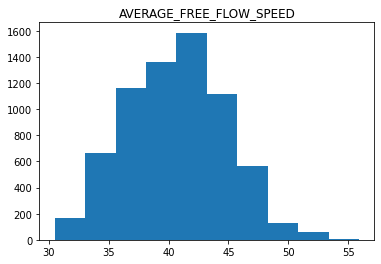

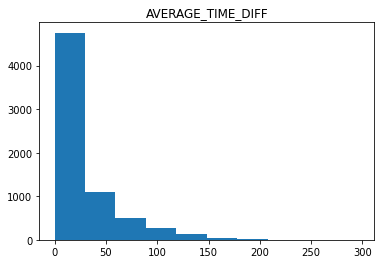

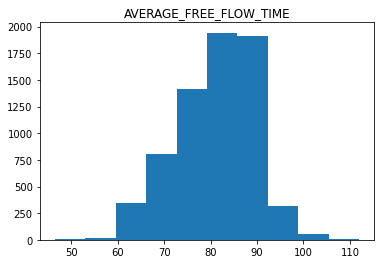

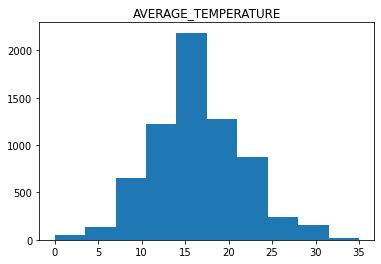

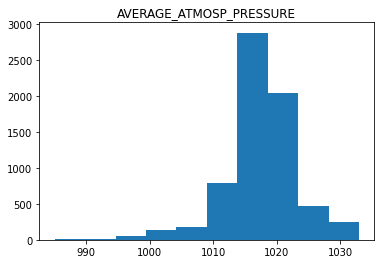

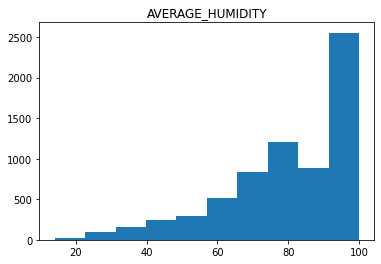

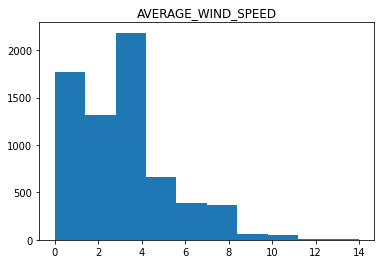

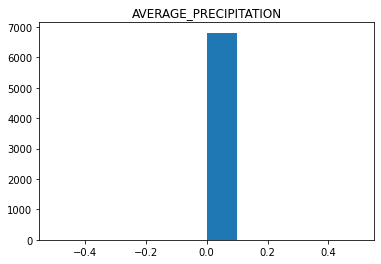

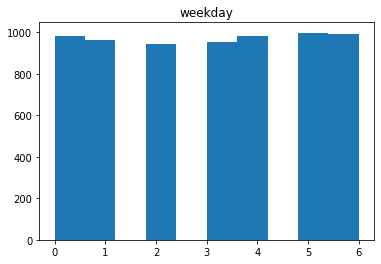

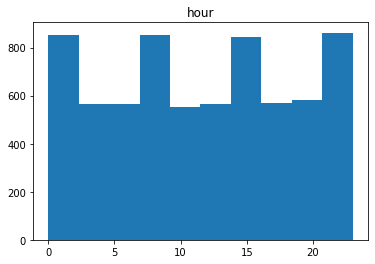

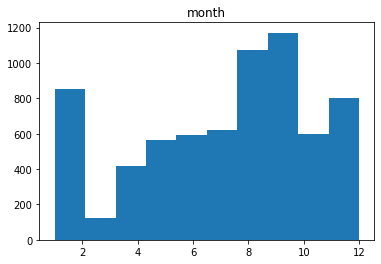

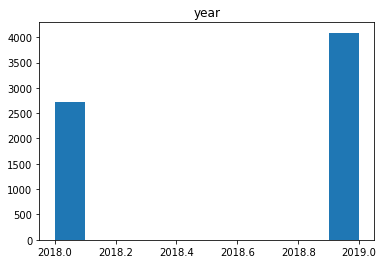

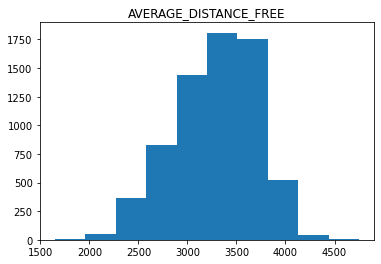

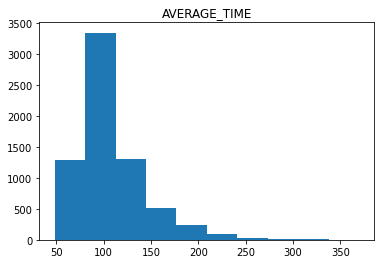

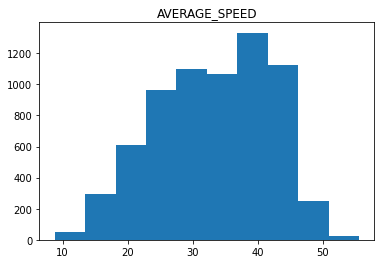

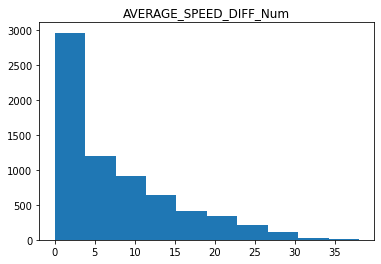

In [733]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                         AVERAGE_FREE_FLOW_SPEED  AVERAGE_TIME_DIFF  \
AVERAGE_FREE_FLOW_SPEED                 1.000000          -0.083653   
AVERAGE_TIME_DIFF                      -0.083653           1.000000   
AVERAGE_FREE_FLOW_TIME                 -0.219890           0.055194   
AVERAGE_TEMPERATURE                    -0.192325           0.205935   
AVERAGE_ATMOSP_PRESSURE                -0.093648           0.006243   
AVERAGE_HUMIDITY                        0.191598          -0.173598   
AVERAGE_WIND_SPEED                     -0.092909           0.169855   
AVERAGE_PRECIPITATION                        NaN                NaN   
weekday                                -0.087912          -0.085474   
hour                                   -0.247337           0.207378   
month                                   0.200550           0.010306   
year                                   -0.164433           0.074928   
AVERAGE_DISTANCE_FREE                   0.621077          -0.034005   
AVERAG

<AxesSubplot:>

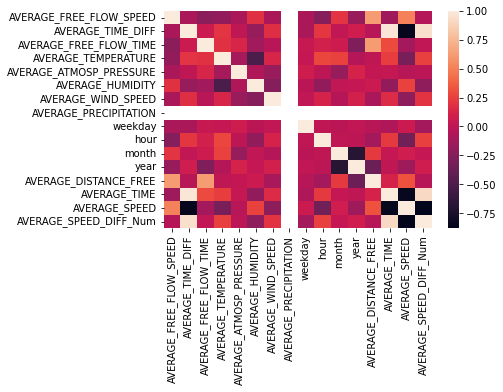

In [734]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [735]:
pd.pivot_table(trainingWork, index= 'AVERAGE_SPEED_DIFF', values=df_num)

,AVERAGE_ATMOSP_PRESSURE,AVERAGE_DISTANCE_FREE,AVERAGE_FREE_FLOW_SPEED,AVERAGE_FREE_FLOW_TIME,AVERAGE_HUMIDITY,AVERAGE_PRECIPITATION,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,AVERAGE_TEMPERATURE,AVERAGE_TIME,AVERAGE_TIME_DIFF,AVERAGE_WIND_SPEED,hour,month,weekday,year
AVERAGE_SPEED_DIFF,,,,,,,,,,,,,,,,
High,1017.357479,3255.291552,39.588147,82.376952,73.802916,0.0,23.413224,16.174922,18.632173,146.178457,63.801505,3.817498,14.806209,7.038570,2.713076,2018.665099
Low,1017.498238,3261.511156,40.480479,80.716561,81.341790,0.0,36.545859,3.934620,16.227625,90.021705,9.305144,2.998591,11.643411,7.096547,3.418605,2018.618746
Medium,1017.431254,3222.723998,38.831617,83.270139,74.528770,0.0,30.006639,8.824979,17.992732,109.924833,26.654694,3.407632,13.711084,7.057541,2.943065,2018.614173
None,1017.417273,3359.646986,41.874818,80.205182,86.367273,0.0,41.120961,0.753857,13.888182,81.798727,1.593545,2.422727,8.310909,7.120000,3.155455,2018.537727
Very_High,1016.847599,3390.211566,44.307307,76.656994,80.588727,0.0,20.236719,24.070588,15.066806,172.903967,96.246973,3.269311,11.254697,7.144050,2.200418,2018.638831


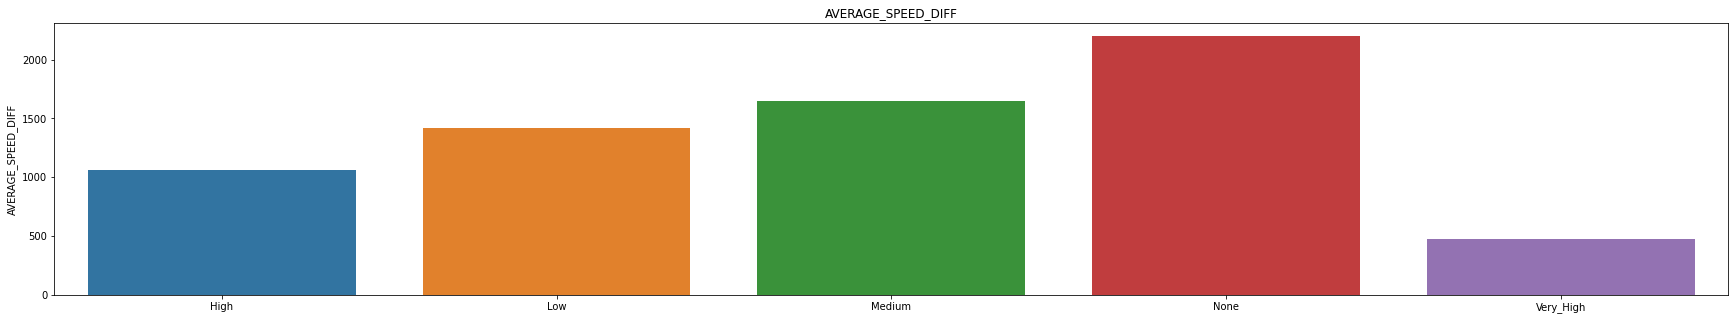

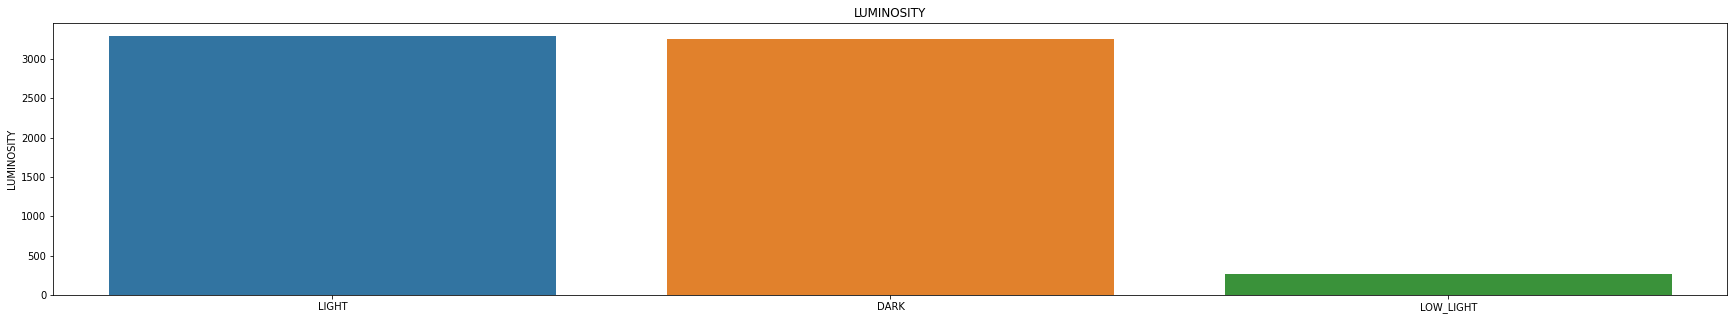

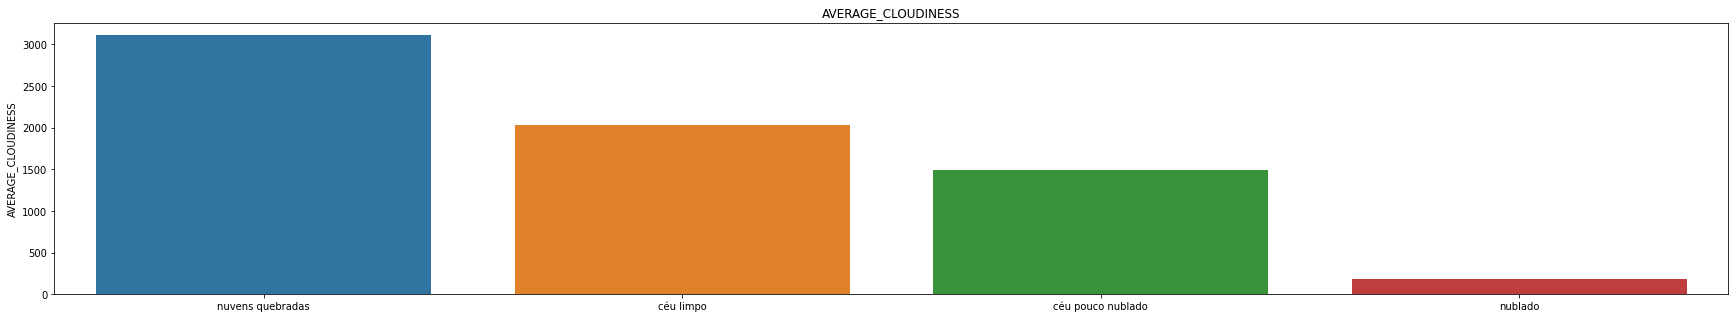

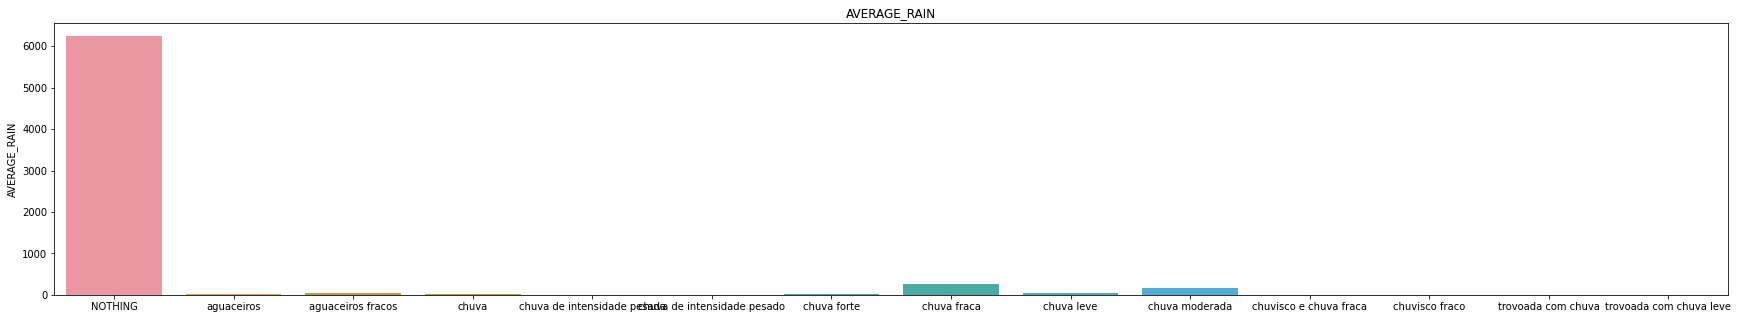

In [736]:
for i in df_cat.columns:
    fig, ax = plt.subplots(figsize=(30,5))
    sns.barplot(x=df_cat[i].value_counts().index,y= df_cat[i].value_counts()).set_title(i)
    plt.show()

In [737]:


# Compare Speed Diff and each of these categorical variables 

print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'LUMINOSITY', values='month' ,aggfunc ='count'))
print()
print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'AVERAGE_CLOUDINESS', values='month' ,aggfunc ='count'))
print()
print(pd.pivot_table(trainingWork, index = 'AVERAGE_SPEED_DIFF', columns = 'AVERAGE_RAIN',values='month',aggfunc ='count'))



LUMINOSITY          DARK  LIGHT  LOW_LIGHT
AVERAGE_SPEED_DIFF                        
High                 149    877         37
Low                  840    518         61
Medium               330   1256         65
None                1897    237         66
Very_High             37    405         37

AVERAGE_CLOUDINESS  céu limpo  céu pouco nublado  nublado  nuvens quebradas
AVERAGE_SPEED_DIFF                                                         
High                      221                373       11               458
Low                       433                328       43               615
Medium                    434                476       28               713
None                      846                191       97              1066
Very_High                  93                124        8               254

AVERAGE_RAIN        NOTHING  aguaceiros  aguaceiros fracos  chuva  \
AVERAGE_SPEED_DIFF                                                  
High                    980

In [738]:
trainingWork['AVERAGE_CLOUDINESS'] = trainingWork['AVERAGE_CLOUDINESS'].fillna(trainingWork['AVERAGE_CLOUDINESS'].mode()[0])
#trainingWork['AVERAGE_CLOUDINESS'] = trainingWork['AVERAGE_CLOUDINESS'].fillna('Not Available')

In [739]:
trainingWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   LUMINOSITY               6812 non-null   object        
 7   AVERAGE_TEMPERATURE      6812 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 9   AVERAGE_HUMIDITY         6812 non-null   float64       
 10  AVERAGE_WIND_SPEED       6812 non-null   float64       
 11  AVERAGE_PRECIPITATION    6812 non-null   float64       
 12  AVERAGE_RAIN             6812 non-

In [740]:
#trainingWorkDropCloudNa = trainingWork[trainingWork['AVERAGE_CLOUDINESS'].notna()]

In [741]:
#trainingWorkDropCloudNa.info()

In [742]:

df_dummies = trainingWork[['LUMINOSITY','AVERAGE_CLOUDINESS','AVERAGE_RAIN']]

In [743]:
dummied = trainingWork.copy()

In [744]:
for i in df_dummies:
    dummied = pd.concat([dummied,pd.get_dummies(dummied[i])],axis='columns').drop([i],axis='columns')

In [745]:
dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   city_name                    6812 non-null   object        
 1   record_date                  6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF           6812 non-null   category      
 3   AVERAGE_FREE_FLOW_SPEED      6812 non-null   float64       
 4   AVERAGE_TIME_DIFF            6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME       6812 non-null   float64       
 6   AVERAGE_TEMPERATURE          6812 non-null   float64       
 7   AVERAGE_ATMOSP_PRESSURE      6812 non-null   float64       
 8   AVERAGE_HUMIDITY             6812 non-null   float64       
 9   AVERAGE_WIND_SPEED           6812 non-null   float64       
 10  AVERAGE_PRECIPITATION        6812 non-null   float64       
 11  AVERAGE_DISTANCE_FREE        6812 non-null 

In [746]:
finalTrain = dummied.drop(['city_name','record_date','AVERAGE_PRECIPITATION','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_DISTANCE_FREE'],axis=1)

In [747]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   AVERAGE_SPEED_DIFF           6812 non-null   category
 1   AVERAGE_TIME_DIFF            6812 non-null   float64 
 2   AVERAGE_TEMPERATURE          6812 non-null   float64 
 3   AVERAGE_ATMOSP_PRESSURE      6812 non-null   float64 
 4   AVERAGE_HUMIDITY             6812 non-null   float64 
 5   AVERAGE_WIND_SPEED           6812 non-null   float64 
 6   AVERAGE_TIME                 6812 non-null   float64 
 7   AVERAGE_SPEED                6812 non-null   float64 
 8   AVERAGE_SPEED_DIFF_Num       6812 non-null   float64 
 9   year                         6812 non-null   int64   
 10  day                          6812 non-null   int64   
 11  weekday                      6812 non-null   int64   
 12  hour                         6812 non-null   int64   
 13  mon

In [748]:
finalTrain['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [749]:
#finalTrain['AVERAGE_SPEED_DIFF'] = finalTrain['AVERAGE_SPEED_DIFF'].map(lambda x: '0' if 'None' in x else "1" if 'Low' in x else '2' if 'Medium' in x else '4' if 'Very_High' in x else '3' if 'Very' in x else "")

#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'None', 'AVERAGE_SPEED_DIFF'] = 0
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Low', 'AVERAGE_SPEED_DIFF'] = 1
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Medium', 'AVERAGE_SPEED_DIFF'] = 2
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'High', 'AVERAGE_SPEED_DIFF'] = 3
#finalTrain.loc[finalTrain.AVERAGE_SPEED_DIFF == 'Very_High', 'AVERAGE_SPEED_DIFF'] = 4

In [750]:
finalTrain['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [751]:
finalTrain = finalTrain.reindex(sorted(finalTrain.columns), axis=1)

In [752]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   AVERAGE_ATMOSP_PRESSURE      6812 non-null   float64 
 1   AVERAGE_HUMIDITY             6812 non-null   float64 
 2   AVERAGE_SPEED                6812 non-null   float64 
 3   AVERAGE_SPEED_DIFF           6812 non-null   category
 4   AVERAGE_SPEED_DIFF_Num       6812 non-null   float64 
 5   AVERAGE_TEMPERATURE          6812 non-null   float64 
 6   AVERAGE_TIME                 6812 non-null   float64 
 7   AVERAGE_TIME_DIFF            6812 non-null   float64 
 8   AVERAGE_WIND_SPEED           6812 non-null   float64 
 9   DARK                         6812 non-null   uint8   
 10  LIGHT                        6812 non-null   uint8   
 11  LOW_LIGHT                    6812 non-null   uint8   
 12  NOTHING                      6812 non-null   uint8   
 13  agu

In [753]:

X = finalTrain.drop(['AVERAGE_SPEED_DIFF'],axis=1)

y = finalTrain['AVERAGE_SPEED_DIFF']


In [754]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 

In [755]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2021,stratify=y)

In [756]:
smote = SMOTE()

In [757]:

#ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)
#X_res, y_res = ros.fit_resample(X_train, y_train)
#y_res.value_counts()


In [758]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [759]:
#scaler = StandardScaler()
scaler = RobustScaler()

In [760]:
#smote = SMOTE(sampling_strategy="not majority",random_state=2021)
#X_res, y_res = smote.fit_resample(X_train, y_train)

In [761]:
sm = BorderlineSMOTE(random_state=2021,kind='borderline-2')
X_res, y_res = sm.fit_resample(X_train, y_train)

In [762]:
#sme = SMOTEENN(random_state=2021,sampling_strategy='not majority')
#X_res, y_res = sme.fit_resample(X_train, y_train)

In [763]:
#smt = SMOTETomek(random_state=2021,sampling_strategy='auto')
#X_res, y_res = smt.fit_resample(X_train, y_train)

In [764]:
#sm = SVMSMOTE(random_state=2021,sampling_strategy="not majority")
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [765]:
X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.fit_transform(X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])
X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

<AxesSubplot:ylabel='AVERAGE_SPEED_DIFF'>

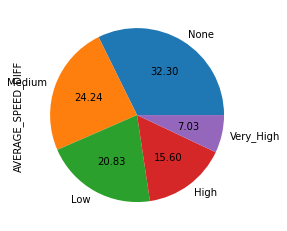

In [766]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='AVERAGE_SPEED_DIFF'>

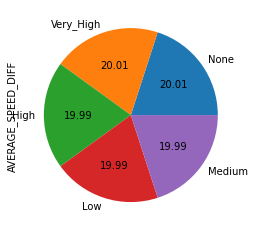

In [767]:
y_res.value_counts().plot.pie(autopct='%.2f')

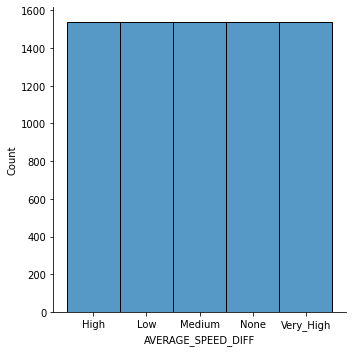

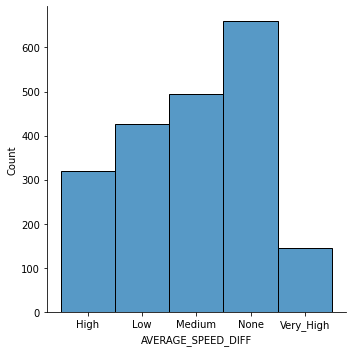

In [768]:
sns.displot(y_res)
sns.displot(y_test)

In [769]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [770]:

gnb = GaussianNB()
cv = cross_val_score(gnb,X,y,cv=5)
print(cv)
print(cv.mean())


[0.55099046 0.58473955 0.55139501 0.56754772 0.64096916]
0.579128380321977


In [771]:

lr = LogisticRegression(random_state=2021,max_iter = 90000000000000,n_jobs=-1)
cv = cross_val_score(lr,X,y,cv=5)
print(cv)
print(cv.mean())


[0.78136464 0.7916361  0.78854626 0.78120411 0.7804699 ]
0.7846441995985792


In [772]:

dt = tree.DecisionTreeClassifier(random_state=2021)
cv = cross_val_score(dt,X,y,cv=5)
print(cv)
print(cv.mean())


[0.72487161 0.72267058 0.74155653 0.71879589 0.72907489]
0.7273938998257924


In [773]:

knn = KNeighborsClassifier(n_jobs=-1)
cv = cross_val_score(knn,X,y,cv=5)
print(cv)
print(cv.mean())


[0.7190022  0.72927366 0.72099853 0.72907489 0.71218796]
0.7221074484784039


In [774]:
rf = RandomForestClassifier(random_state=2021,n_jobs=-1)
cv = cross_val_score(rf,X,y,cv=5)
print(cv)
print(cv.mean())

[0.77769626 0.79677183 0.7958884  0.79515419 0.7907489 ]
0.7912519136438905


In [775]:

svc = SVC(probability = True,random_state=2021)
cv = cross_val_score(svc,X,y,cv=5)
print(cv)
print(cv.mean())


[0.46588408 0.47762289 0.46989721 0.47797357 0.47503671]
0.473282891781216


In [776]:

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2021,n_jobs=-1)
cv = cross_val_score(xgb,X,y,cv=5)
print(cv)
print(cv.mean())


[19:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [777]:
#from sklearn.ensemble import VotingClassifier
#voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft',n_jobs=-1) 

In [778]:
'''
cv = cross_val_score(voting_clf,X_res.values,y_res.values,cv=5)
print(cv)
print(cv.mean())
'''

'\ncv = cross_val_score(voting_clf,X_res.values,y_res.values,cv=5)\nprint(cv)\nprint(cv.mean())\n'

In [779]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [780]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [781]:

param_grid = {'max_iter' : [200000000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X,y)
clf_performance(best_clf_lr,'Logistic Regression')


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.719465677227934
Best Parameters: {'C': 4.281332398719396, 'max_iter': 200000000, 'penalty': 'l1', 'solver': 'liblinear'}


In [782]:

param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X,y)
clf_performance(best_clf_knn,'KNN')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.7482381548001893
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [783]:

param_grid =  {'n_estimators': [50,100,200,300,400,500,600,700,800,900,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X,y)
clf_performance(best_clf_rf,'Random Forest')



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest
Best Score: 0.8003535864460684
Best Parameters: {'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


In [784]:
param_grid =  {'n_estimators': [600],
               'min_samples_split': [5],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [25],
               'criterion': ['entropy'],
               'bootstrap': [False]}
                                  
clf_rf = GridSearchCV(rf, param_grid= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X,y)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest
Best Score: 0.7996200184657882
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}


<AxesSubplot:>

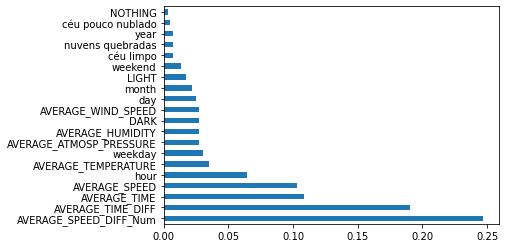

In [785]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [786]:
'''
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]

clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X,y)
clf_performance(best_clf_svc,'SVC')
'''

"\nparam_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],\n                                  'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]\n\nclf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_svc = clf_svc.fit(X,y)\nclf_performance(best_clf_svc,'SVC')\n"

In [787]:
'''
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X,y)
clf_performance(best_clf_xgb,'XGB')
'''

"\nparam_grid = {\n    'n_estimators': [450,500,550],\n    'colsample_bytree': [0.75,0.8,0.85],\n    'max_depth': [None],\n    'reg_alpha': [1],\n    'reg_lambda': [2, 5, 10],\n    'subsample': [0.55, 0.6, .65],\n    'learning_rate':[0.5],\n    'gamma':[.5,1,2],\n    'min_child_weight':[0.01],\n    'sampling_method': ['uniform']\n}\n\nclf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X,y)\nclf_performance(best_clf_xgb,'XGB')\n"

In [788]:

param_grid = {
    'n_estimators': [550],
    'colsample_bytree': [0.75],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2],
    'subsample': [0.55],
    'learning_rate':[0.5],
    'gamma':[.5],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X,y)
clf_performance(best_clf_xgb,'XGB')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[19:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
Best Score: 0.7916911494576079
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.55}


In [789]:
lr.fit(X_res,y_res)
dt.fit(X_res,y_res)
knn.fit(X_res,y_res)
rf.fit(X_res,y_res)
xgb.fit(X_res,y_res)

[19:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [790]:
predictions = best_clf_rf.predict(X_test)

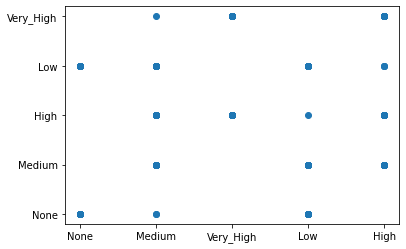

In [791]:
plt.scatter(y_test,predictions)

In [792]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [793]:
#ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)


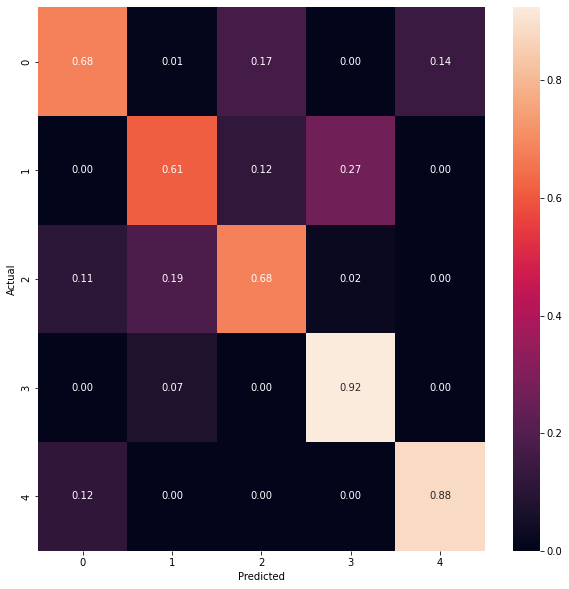

In [794]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [795]:
#ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

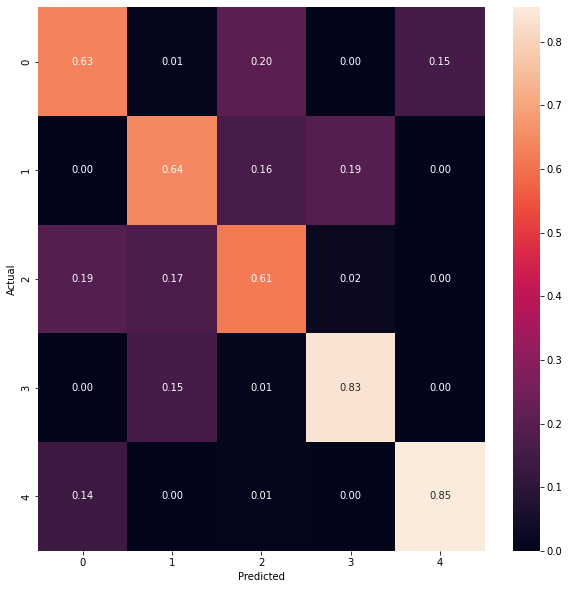

In [796]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [797]:
#ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

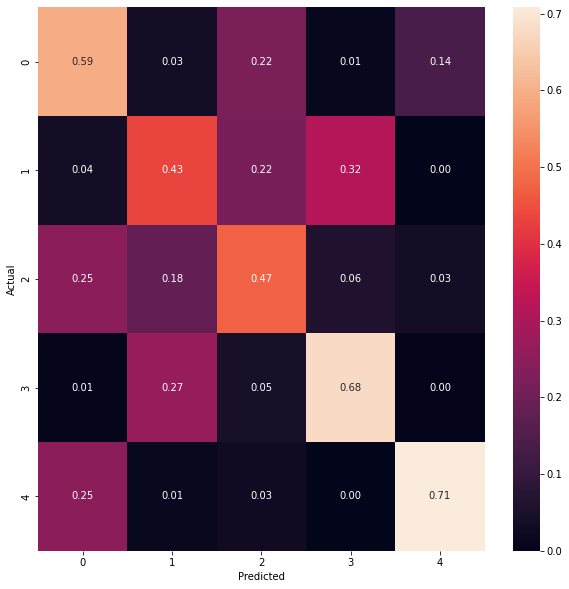

In [798]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [799]:
#ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

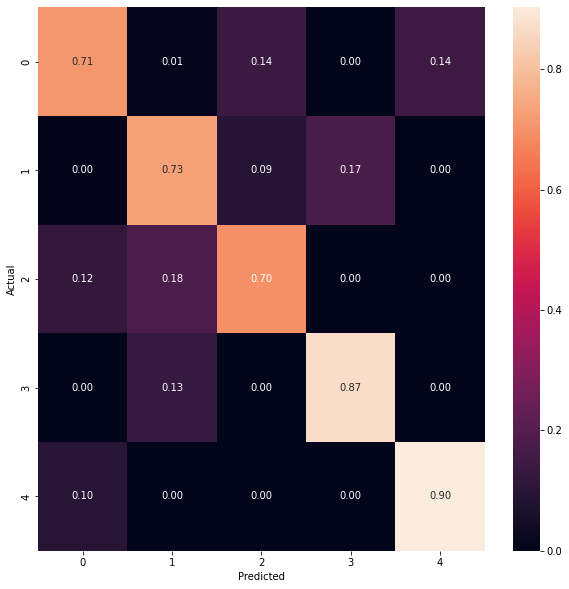

In [800]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [801]:
#ConfusionMatrixDisplay.from_estimator(best_clf_rf, X_test, y_test)

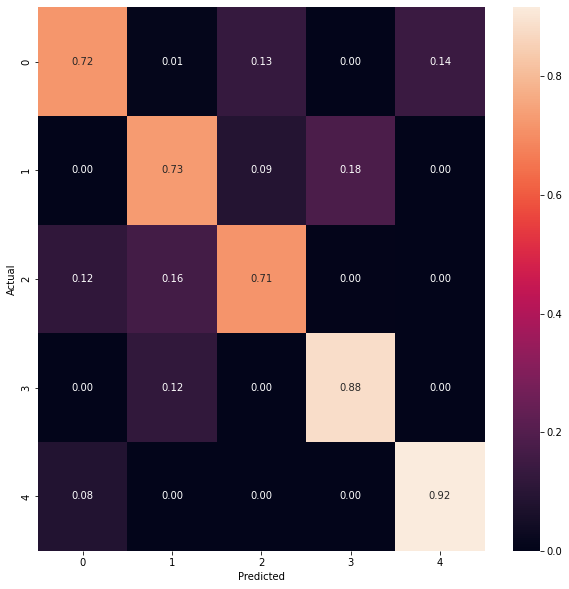

In [802]:
y_pred = best_clf_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [803]:
#ConfusionMatrixDisplay.from_estimator(best_clf_xgb, X_test, y_test)

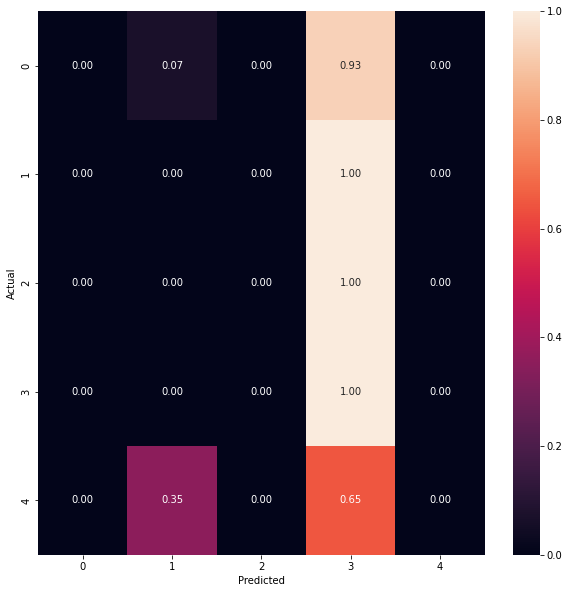

In [804]:
y_pred = best_clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [805]:
testing = pd.read_csv('workedTesting.csv')

In [806]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   AVERAGE_ATMOSP_PRESSURE      6812 non-null   float64 
 1   AVERAGE_HUMIDITY             6812 non-null   float64 
 2   AVERAGE_SPEED                6812 non-null   float64 
 3   AVERAGE_SPEED_DIFF           6812 non-null   category
 4   AVERAGE_SPEED_DIFF_Num       6812 non-null   float64 
 5   AVERAGE_TEMPERATURE          6812 non-null   float64 
 6   AVERAGE_TIME                 6812 non-null   float64 
 7   AVERAGE_TIME_DIFF            6812 non-null   float64 
 8   AVERAGE_WIND_SPEED           6812 non-null   float64 
 9   DARK                         6812 non-null   uint8   
 10  LIGHT                        6812 non-null   uint8   
 11  LOW_LIGHT                    6812 non-null   uint8   
 12  NOTHING                      6812 non-null   uint8   
 13  agu

In [807]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 1   AVERAGE_HUMIDITY         1500 non-null   float64
 2   AVERAGE_SPEED            1500 non-null   float64
 3   AVERAGE_SPEED_DIFF_Num   1500 non-null   float64
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_TIME             1500 non-null   float64
 6   AVERAGE_TIME_DIFF        1500 non-null   float64
 7   AVERAGE_WIND_SPEED       1500 non-null   float64
 8   DARK                     1500 non-null   int64  
 9   LIGHT                    1500 non-null   int64  
 10  LOW_LIGHT                1500 non-null   int64  
 11  céu limpo                1500 non-null   int64  
 12  céu pouco nublado        1500 non-null   int64  
 13  day                      1500 non-null   int64  
 14  hour                    

In [808]:
testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

In [809]:
prediction = best_clf_rf.predict(testing)

C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- NOTHING
- aguaceiros
- aguaceiros fracos
- chuva
- chuva de intensidade pesada
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 21 features, but RandomForestClassifier is expecting 35 features as input.

In [1]:
sub_df = pd.read_csv('example_submission.csv')
final_data = {'RowId': sub_df.RowId, 'Speed_Diff': prediction}
submission = pd.DataFrame(data=final_data)

NameError: name 'pd' is not defined

In [ ]:
submission['Speed_Diff'].value_counts()

None         483
Medium       330
Low          320
High         273
Very_High     94
Name: Speed_Diff, dtype: int64

In [ ]:
#pred = pd.DataFrame(prediction)
#sub_df = pd.read_csv('example_submission.csv')
#datasets=pd.concat([sub_df['RowId'],pred],axis=1)
#datasets.columns=['RowId','Speed_Diff']
#datasets

In [ ]:
compare = pd.read_csv('sample_submission.csv')

In [ ]:
compare['Speed_Diff'].value_counts()

None         495
Medium       326
Low          312
High         268
Very_High     99
Name: Speed_Diff, dtype: int64

In [ ]:
df1 = np.where(submission['Speed_Diff'] == compare['Speed_Diff'], 'True', 'False')
df1 = pd.DataFrame(df1)
df1.columns=['equals']
df1.value_counts()

equals
True      1403
False       97
dtype: int64

In [ ]:
submission.to_csv('submission.csv',index=False)